Import Python libraries

In [92]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import seaborn as sns
import cartopy.crs as ccrs
import pandas as pd
import glob
import pyresample

Open data

In [1]:
open_path = 'path'

In [2]:
Save_path = "path"

In [96]:
stacked_diffs = xr.open_mfdataset(open_path+'*.nc', concat_dim='time', combine='nested')

Calculate mean values for month

In [22]:
stacked_diffs_mean = stacked_diffs.mean('time')

In [9]:
Mask1 = np.loadtxt("D:/analyysi/Masking_bare_ice_surfaces_for_SMAC/Mask1_sea.txt")
print(Mask1)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


Mask data with Mask 1

In [53]:
Mask1_stacked_diffs_mean = stacked_diffs_mean*Mask1

Select variables to be reprojected

In [43]:
Mask1_Diff_alb_SAL_TOA = Mask1_stacked_diffs_mean['Diff_alb_SAL_TOA']

In [44]:
Mask1_TOA_alb = Mask1_stacked_diffs_mean['TOA_alb']

In [45]:
Mask1_SAL_alb = Mask1_stacked_diffs_mean['SAL_alb']

In [46]:
Mask1_Water_vapour = Mask1_stacked_diffs_mean['Water_vapour']

In [41]:
Mask1_Ozone = Mask1_stacked_diffs_mean['Ozone']

In [47]:
Mask1_Surface_pressure = Mask1_stacked_diffs_mean['Surface_pressure']

In [48]:
Mask1_sun_azimuth = Mask1_stacked_diffs_mean['sun_azimuth']

In [49]:
Mask1_sun_zenith = Mask1_stacked_diffs_mean['sun_zenith']

In [51]:
Mask1_satellite_azimuth = Mask1_stacked_diffs_mean['satellite_azimuth']

In [52]:
Mask1_satellite_zenith = Mask1_stacked_diffs_mean['satellite_zenith']

Reproject each variable separately

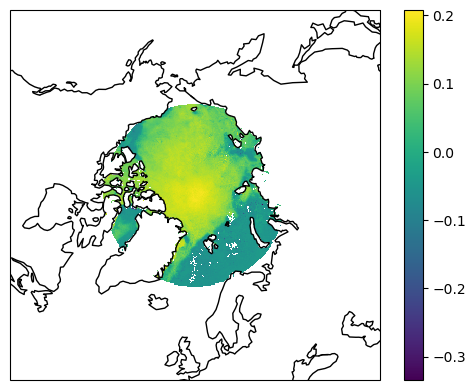

In [55]:
tgt  = pyresample.area_config.create_area_def('nhease2', 'epsg:6931', width=360, height=360, resolution=25000, area_extent= (-4487500.0, -4487500.0, 4487500.0, 4487500.0))
    
tgt_lon, tgt_lat = tgt.get_lonlats()
    
source = pyresample.SwathDefinition(lats=Mask1_stacked_diffs_mean['lat'].squeeze(), lons=Mask1_stacked_diffs_mean['lon'].squeeze())
reproj_diff1_Diff_alb_SAL_TOA = pyresample.kd_tree.resample_nearest(source, Mask1_Diff_alb_SAL_TOA.squeeze().values, tgt, radius_of_influence=30000, fill_value=np.nan)
reproj_diff1_Diff_alb_SAL_TOA 

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()
image = ax.pcolormesh(tgt_lon, tgt_lat, reproj_diff1_Diff_alb_SAL_TOA, transform=ccrs.PlateCarree())
plt.colorbar(image)
plt.show()

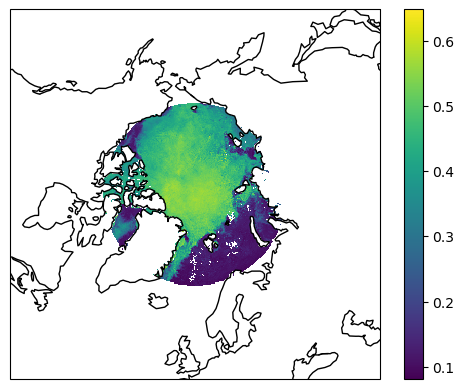

In [56]:
tgt  = pyresample.area_config.create_area_def('nhease2', 'epsg:6931', width=360, height=360, resolution=25000, area_extent= (-4487500.0, -4487500.0, 4487500.0, 4487500.0))
    
tgt_lon, tgt_lat = tgt.get_lonlats()
    
source = pyresample.SwathDefinition(lats=Mask1_stacked_diffs_mean['lat'].squeeze(), lons=Mask1_stacked_diffs_mean['lon'].squeeze())
reproj_diff1_TOA_alb = pyresample.kd_tree.resample_nearest(source, Mask1_TOA_alb.squeeze().values, tgt, radius_of_influence=30000, fill_value=np.nan)
reproj_diff1_TOA_alb 

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()
image = ax.pcolormesh(tgt_lon, tgt_lat, reproj_diff1_TOA_alb, transform=ccrs.PlateCarree())
plt.colorbar(image)
plt.show()

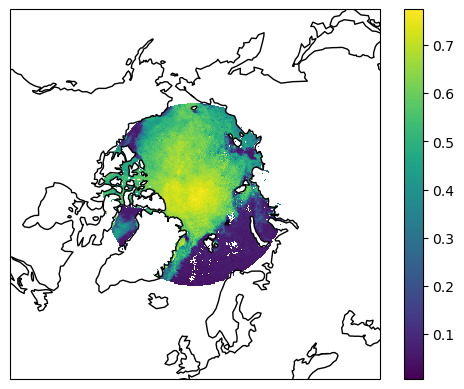

In [57]:
tgt  = pyresample.area_config.create_area_def('nhease2', 'epsg:6931', width=360, height=360, resolution=25000, area_extent= (-4487500.0, -4487500.0, 4487500.0, 4487500.0))
    
tgt_lon, tgt_lat = tgt.get_lonlats()
    
source = pyresample.SwathDefinition(lats=Mask1_stacked_diffs_mean['lat'].squeeze(), lons=Mask1_stacked_diffs_mean['lon'].squeeze())
reproj_diff1_SAL_alb = pyresample.kd_tree.resample_nearest(source, Mask1_SAL_alb.squeeze().values, tgt, radius_of_influence=30000, fill_value=np.nan)
reproj_diff1_SAL_alb

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()
image = ax.pcolormesh(tgt_lon, tgt_lat, reproj_diff1_SAL_alb, transform=ccrs.PlateCarree())
plt.colorbar(image)
plt.show()

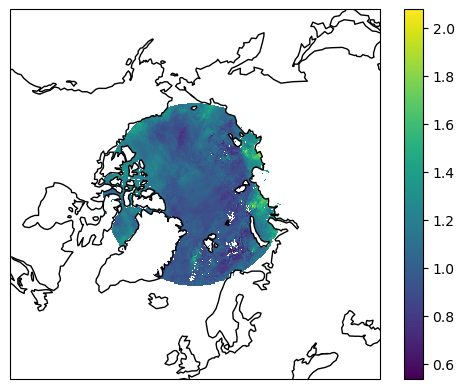

In [58]:
tgt  = pyresample.area_config.create_area_def('nhease2', 'epsg:6931', width=360, height=360, resolution=25000, area_extent= (-4487500.0, -4487500.0, 4487500.0, 4487500.0))
    
tgt_lon, tgt_lat = tgt.get_lonlats()
    
source = pyresample.SwathDefinition(lats=Mask1_stacked_diffs_mean['lat'].squeeze(), lons=Mask1_stacked_diffs_mean['lon'].squeeze())
reproj_diff1_Water_vapour = pyresample.kd_tree.resample_nearest(source, Mask1_Water_vapour.squeeze().values, tgt, radius_of_influence=30000, fill_value=np.nan)
reproj_diff1_Water_vapour 

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()
image = ax.pcolormesh(tgt_lon, tgt_lat, reproj_diff1_Water_vapour, transform=ccrs.PlateCarree())
plt.colorbar(image)
plt.show()

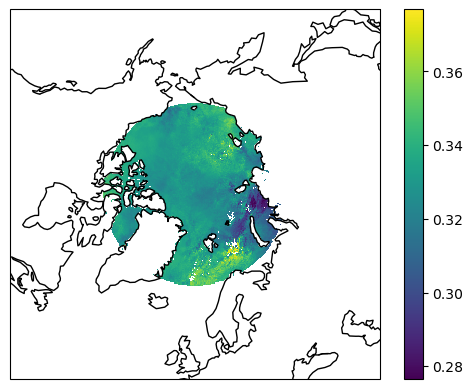

In [59]:
tgt  = pyresample.area_config.create_area_def('nhease2', 'epsg:6931', width=360, height=360, resolution=25000, area_extent= (-4487500.0, -4487500.0, 4487500.0, 4487500.0))
    
tgt_lon, tgt_lat = tgt.get_lonlats()
    
source = pyresample.SwathDefinition(lats=Mask1_stacked_diffs_mean['lat'].squeeze(), lons=Mask1_stacked_diffs_mean['lon'].squeeze())
reproj_diff1_Ozone = pyresample.kd_tree.resample_nearest(source, Mask1_Ozone.squeeze().values, tgt, radius_of_influence=30000, fill_value=np.nan)
reproj_diff1_Ozone 

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()
image = ax.pcolormesh(tgt_lon, tgt_lat, reproj_diff1_Ozone, transform=ccrs.PlateCarree())
plt.colorbar(image)
plt.show()

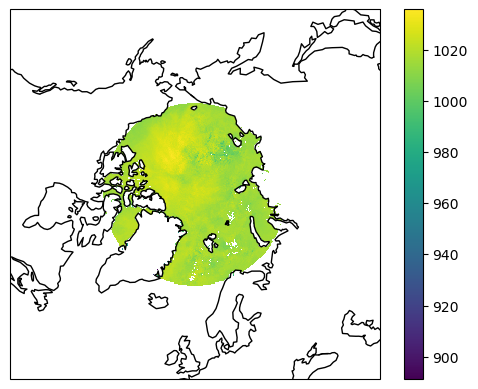

In [60]:
tgt  = pyresample.area_config.create_area_def('nhease2', 'epsg:6931', width=360, height=360, resolution=25000, area_extent= (-4487500.0, -4487500.0, 4487500.0, 4487500.0))
    
tgt_lon, tgt_lat = tgt.get_lonlats()
    
source = pyresample.SwathDefinition(lats=Mask1_stacked_diffs_mean['lat'].squeeze(), lons=Mask1_stacked_diffs_mean['lon'].squeeze())
reproj_diff1_Surface_pressure = pyresample.kd_tree.resample_nearest(source, Mask1_Surface_pressure.squeeze().values, tgt, radius_of_influence=30000, fill_value=np.nan)
reproj_diff1_Surface_pressure 

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()
image = ax.pcolormesh(tgt_lon, tgt_lat, reproj_diff1_Surface_pressure, transform=ccrs.PlateCarree())
plt.colorbar(image)
plt.show()

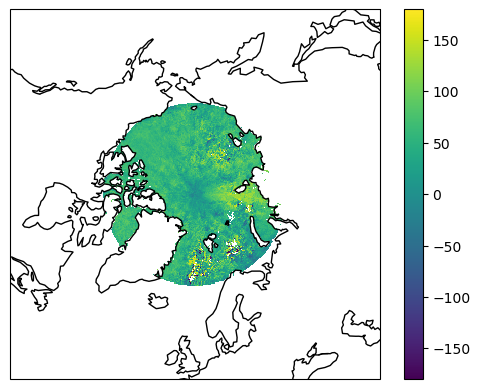

In [61]:
tgt  = pyresample.area_config.create_area_def('nhease2', 'epsg:6931', width=360, height=360, resolution=25000, area_extent= (-4487500.0, -4487500.0, 4487500.0, 4487500.0))
    
tgt_lon, tgt_lat = tgt.get_lonlats()
    
source = pyresample.SwathDefinition(lats=Mask1_stacked_diffs_mean['lat'].squeeze(), lons=Mask1_stacked_diffs_mean['lon'].squeeze())
reproj_diff1_sun_azimuth = pyresample.kd_tree.resample_nearest(source, Mask1_sun_azimuth.squeeze().values, tgt, radius_of_influence=30000, fill_value=np.nan)
reproj_diff1_sun_azimuth 

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()
image = ax.pcolormesh(tgt_lon, tgt_lat, reproj_diff1_sun_azimuth, transform=ccrs.PlateCarree())
plt.colorbar(image)
plt.show()

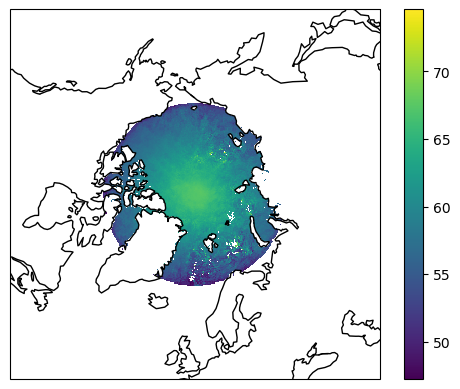

In [62]:
tgt  = pyresample.area_config.create_area_def('nhease2', 'epsg:6931', width=360, height=360, resolution=25000, area_extent= (-4487500.0, -4487500.0, 4487500.0, 4487500.0))
    
tgt_lon, tgt_lat = tgt.get_lonlats()
    
source = pyresample.SwathDefinition(lats=Mask1_stacked_diffs_mean['lat'].squeeze(), lons=Mask1_stacked_diffs_mean['lon'].squeeze())
reproj_diff1_sun_zenith = pyresample.kd_tree.resample_nearest(source, Mask1_sun_zenith.squeeze().values, tgt, radius_of_influence=30000, fill_value=np.nan)
reproj_diff1_sun_zenith 

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()
image = ax.pcolormesh(tgt_lon, tgt_lat, reproj_diff1_sun_zenith, transform=ccrs.PlateCarree())
plt.colorbar(image)
plt.show()

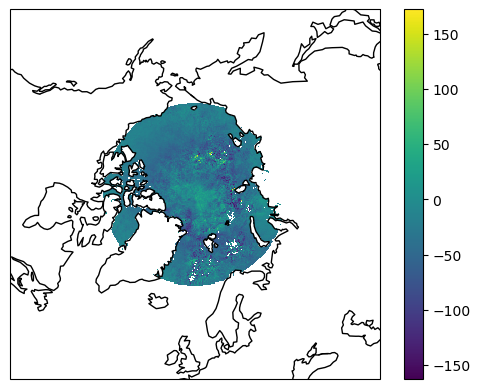

In [63]:
tgt  = pyresample.area_config.create_area_def('nhease2', 'epsg:6931', width=360, height=360, resolution=25000, area_extent= (-4487500.0, -4487500.0, 4487500.0, 4487500.0))
    
tgt_lon, tgt_lat = tgt.get_lonlats()
    
source = pyresample.SwathDefinition(lats=Mask1_stacked_diffs_mean['lat'].squeeze(), lons=Mask1_stacked_diffs_mean['lon'].squeeze())
reproj_diff1_satellite_azimuth = pyresample.kd_tree.resample_nearest(source, Mask1_satellite_azimuth.squeeze().values, tgt, radius_of_influence=30000, fill_value=np.nan)
reproj_diff1_satellite_azimuth 

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()
image = ax.pcolormesh(tgt_lon, tgt_lat, reproj_diff1_satellite_azimuth, transform=ccrs.PlateCarree())
plt.colorbar(image)
plt.show()

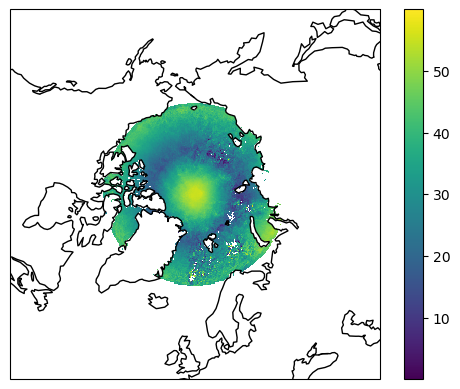

In [64]:
tgt  = pyresample.area_config.create_area_def('nhease2', 'epsg:6931', width=360, height=360, resolution=25000, area_extent= (-4487500.0, -4487500.0, 4487500.0, 4487500.0))
    
tgt_lon, tgt_lat = tgt.get_lonlats()
    
source = pyresample.SwathDefinition(lats=Mask1_stacked_diffs_mean['lat'].squeeze(), lons=Mask1_stacked_diffs_mean['lon'].squeeze())
reproj_diff1_satellite_zenith = pyresample.kd_tree.resample_nearest(source, Mask1_satellite_zenith.squeeze().values, tgt, radius_of_influence=30000, fill_value=np.nan)
reproj_diff1_satellite_zenith 

ax = plt.axes(projection=ccrs.LambertAzimuthalEqualArea(central_latitude=90))
ax.coastlines()
image = ax.pcolormesh(tgt_lon, tgt_lat, reproj_diff1_satellite_zenith, transform=ccrs.PlateCarree())
plt.colorbar(image)
plt.show()

Create an array for each variable

In [65]:
reproj_Diff_alb_SAL_TOA_mask1_xr = xr.DataArray(reproj_diff1_Diff_alb_SAL_TOA, dims=(('y','x')))
print(reproj_Diff_alb_SAL_TOA_mask1_xr)
#reproj_psur_mask_xr['time'] = SALtime
reproj_Diff_alb_SAL_TOA_mask1_xr['lon'] = (('y','x'), tgt_lon)
reproj_Diff_alb_SAL_TOA_mask1_xr['lat'] = (('y','x'), tgt_lat)
reproj_Diff_alb_SAL_TOA_mask1_xr.name = 'Diff_alb_SAL_TOA'
print(reproj_Diff_alb_SAL_TOA_mask1_xr)

<xarray.DataArray (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x
<xarray.DataArray 'Diff_alb_SAL_TOA' (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lon      (y, x) float64 -135.0 -135.2 -135.3 -135.5 ... 44.68 44.84 45.0
    lat      (y, x) float64 30.55 30.73 30.92 31.1 ... 31.1 30.92 30.73 30.55
Dimensions without coordinates: y, x


In [66]:
reproj_TOA_alb_mask1_xr = xr.DataArray(reproj_diff1_TOA_alb, dims=(('y','x')))
print(reproj_TOA_alb_mask1_xr)
#reproj_psur_mask_xr['time'] = SALtime
reproj_TOA_alb_mask1_xr['lon'] = (('y','x'), tgt_lon)
reproj_TOA_alb_mask1_xr['lat'] = (('y','x'), tgt_lat)
reproj_TOA_alb_mask1_xr.name = 'TOA_alb'
print(reproj_TOA_alb_mask1_xr)

<xarray.DataArray (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x
<xarray.DataArray 'TOA_alb' (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lon      (y, x) float64 -135.0 -135.2 -135.3 -135.5 ... 44.68 44.84 45.0
    lat      (y, x) float64 30.55 30.73 30.92 31.1 ... 31.1 30.92 30.73 30.55
Dimensions without coordinates: y, x


In [68]:
reproj_SAL_alb_mask1_xr = xr.DataArray(reproj_diff1_SAL_alb, dims=(('y','x')))
print(reproj_SAL_alb_mask1_xr)
#reproj_psur_mask_xr['time'] = SALtime
reproj_SAL_alb_mask1_xr['lon'] = (('y','x'), tgt_lon)
reproj_SAL_alb_mask1_xr['lat'] = (('y','x'), tgt_lat)
reproj_SAL_alb_mask1_xr.name = 'SAL_alb'
print(reproj_SAL_alb_mask1_xr)

<xarray.DataArray (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x
<xarray.DataArray 'SAL_alb' (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lon      (y, x) float64 -135.0 -135.2 -135.3 -135.5 ... 44.68 44.84 45.0
    lat      (y, x) float64 30.55 30.73 30.92 31.1 ... 31.1 30.92 30.73 30.55
Dimensions without coordinates: y, x


In [69]:
reproj_Water_vapour_mask1_xr = xr.DataArray(reproj_diff1_Water_vapour, dims=(('y','x')))
print(reproj_Water_vapour_mask1_xr)
#reproj_psur_mask_xr['time'] = SALtime
reproj_Water_vapour_mask1_xr['lon'] = (('y','x'), tgt_lon)
reproj_Water_vapour_mask1_xr['lat'] = (('y','x'), tgt_lat)
reproj_Water_vapour_mask1_xr.name = 'Water_vapour'
print(reproj_Water_vapour_mask1_xr)

<xarray.DataArray (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x
<xarray.DataArray 'Water_vapour' (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lon      (y, x) float64 -135.0 -135.2 -135.3 -135.5 ... 44.68 44.84 45.0
    lat      (y, x) float64 30.55 30.73 30.92 31.1 ... 31.1 30.92 30.73 30.55
Dimensions without coordinates: y, x


In [70]:
reproj_Ozone_mask1_xr = xr.DataArray(reproj_diff1_Ozone, dims=(('y','x')))
print(reproj_Ozone_mask1_xr)
#reproj_psur_mask_xr['time'] = SALtime
reproj_Ozone_mask1_xr['lon'] = (('y','x'), tgt_lon)
reproj_Ozone_mask1_xr['lat'] = (('y','x'), tgt_lat)
reproj_Ozone_mask1_xr.name = 'Ozone'
print(reproj_Ozone_mask1_xr)

<xarray.DataArray (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x
<xarray.DataArray 'Ozone' (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lon      (y, x) float64 -135.0 -135.2 -135.3 -135.5 ... 44.68 44.84 45.0
    lat      (y, x) float64 30.55 30.73 30.92 31.1 ... 31.1 30.92 30.73 30.55
Dimensions without coordinates: y, x


In [71]:
reproj_Surface_pressure_mask1_xr = xr.DataArray(reproj_diff1_Surface_pressure, dims=(('y','x')))
print(reproj_Surface_pressure_mask1_xr)
#reproj_psur_mask_xr['time'] = SALtime
reproj_Surface_pressure_mask1_xr['lon'] = (('y','x'), tgt_lon)
reproj_Surface_pressure_mask1_xr['lat'] = (('y','x'), tgt_lat)
reproj_Surface_pressure_mask1_xr.name = 'Surface_pressure'
print(reproj_Surface_pressure_mask1_xr)

<xarray.DataArray (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x
<xarray.DataArray 'Surface_pressure' (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lon      (y, x) float64 -135.0 -135.2 -135.3 -135.5 ... 44.68 44.84 45.0
    lat      (y, x) float64 30.55 30.73 30.92 31.1 ... 31.1 30.92 30.73 30.55
Dimensions without coordinates: y, x


In [72]:
reproj_sun_azimuth_mask1_xr = xr.DataArray(reproj_diff1_sun_azimuth, dims=(('y','x')))
print(reproj_sun_azimuth_mask1_xr)
#reproj_psur_mask_xr['time'] = SALtime
reproj_sun_azimuth_mask1_xr['lon'] = (('y','x'), tgt_lon)
reproj_sun_azimuth_mask1_xr['lat'] = (('y','x'), tgt_lat)
reproj_sun_azimuth_mask1_xr.name = 'sun_azimuth'
print(reproj_sun_azimuth_mask1_xr)

<xarray.DataArray (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x
<xarray.DataArray 'sun_azimuth' (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lon      (y, x) float64 -135.0 -135.2 -135.3 -135.5 ... 44.68 44.84 45.0
    lat      (y, x) float64 30.55 30.73 30.92 31.1 ... 31.1 30.92 30.73 30.55
Dimensions without coordinates: y, x


In [73]:
reproj_sun_zenith_mask1_xr = xr.DataArray(reproj_diff1_sun_zenith, dims=(('y','x')))
print(reproj_sun_zenith_mask1_xr)
#reproj_psur_mask_xr['time'] = SALtime
reproj_sun_zenith_mask1_xr['lon'] = (('y','x'), tgt_lon)
reproj_sun_zenith_mask1_xr['lat'] = (('y','x'), tgt_lat)
reproj_sun_zenith_mask1_xr.name = 'sun_zenith'
print(reproj_sun_zenith_mask1_xr)

<xarray.DataArray (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x
<xarray.DataArray 'sun_zenith' (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lon      (y, x) float64 -135.0 -135.2 -135.3 -135.5 ... 44.68 44.84 45.0
    lat      (y, x) float64 30.55 30.73 30.92 31.1 ... 31.1 30.92 30.73 30.55
Dimensions without coordinates: y, x


In [74]:
reproj_satellite_azimuth_mask1_xr = xr.DataArray(reproj_diff1_satellite_azimuth, dims=(('y','x')))
print(reproj_satellite_azimuth_mask1_xr)
#reproj_psur_mask_xr['time'] = SALtime
reproj_satellite_azimuth_mask1_xr['lon'] = (('y','x'), tgt_lon)
reproj_satellite_azimuth_mask1_xr['lat'] = (('y','x'), tgt_lat)
reproj_satellite_azimuth_mask1_xr.name = 'satellite_azimuth'
print(reproj_satellite_azimuth_mask1_xr)

<xarray.DataArray (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x
<xarray.DataArray 'satellite_azimuth' (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lon      (y, x) float64 -135.0 -135.2 -135.3 -135.5 ... 44.68 44.84 45.0
    lat      (y, x) float64 30.55 30.73 30.92 31.1 ... 31.1 30.92 30.73 30.55
Dimensions without coordinates: y, x


In [75]:
reproj_satellite_zenith_mask1_xr = xr.DataArray(reproj_diff1_satellite_zenith, dims=(('y','x')))
print(reproj_satellite_zenith_mask1_xr)
#reproj_psur_mask_xr['time'] = SALtime
reproj_satellite_zenith_mask1_xr['lon'] = (('y','x'), tgt_lon)
reproj_satellite_zenith_mask1_xr['lat'] = (('y','x'), tgt_lat)
reproj_satellite_zenith_mask1_xr.name = 'satellite_zenith'
print(reproj_satellite_zenith_mask1_xr)

<xarray.DataArray (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Dimensions without coordinates: y, x
<xarray.DataArray 'satellite_zenith' (y: 360, x: 360)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
    lon      (y, x) float64 -135.0 -135.2 -135.3 -135.5 ... 44.68 44.84 45.0
    lat      (y, x) float64 30.55 30.73 30.92 31.1 ... 31.1 30.92 30.73 30.55
Dimensions without coordinates: y, x


Combine data in a single xarray

In [76]:
combine_data_xr = xr.merge([reproj_Diff_alb_SAL_TOA_mask1_xr, reproj_TOA_alb_mask1_xr, reproj_SAL_alb_mask1_xr, reproj_Water_vapour_mask1_xr, reproj_Ozone_mask1_xr, reproj_Surface_pressure_mask1_xr, reproj_sun_azimuth_mask1_xr, reproj_sun_zenith_mask1_xr, reproj_satellite_azimuth_mask1_xr, reproj_satellite_zenith_mask1_xr])

Show data

In [77]:
combine_data_xr

<xarray.Dataset>
Dimensions:            (y: 360, x: 360)
Coordinates:
    lon                (y, x) float64 -135.0 -135.2 -135.3 ... 44.68 44.84 45.0
    lat                (y, x) float64 30.55 30.73 30.92 ... 30.92 30.73 30.55
Dimensions without coordinates: y, x
Data variables:
    Diff_alb_SAL_TOA   (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    TOA_alb            (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    SAL_alb            (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    Water_vapour       (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    Ozone              (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    Surface_pressure   (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    sun_azimuth        (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    sun_zenith         (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    satellite_azimuth  (y, x) float64 nan nan nan nan nan ... nan nan nan nan
    satellite_zenith   (y, x) float64 nan nan nan nan nan ... nan nan nan nan

Save data in NetCDF format

In [78]:
combine_data_xr.to_netcdf(Save_path + 'combined_overpass_mean_062012_Mask1_sea' +  '.nc')